# Introduction to audio data

In [1]:
!pip install librosa

In [2]:
!pip install datasets

In [3]:
!pip install matplotlib

In [4]:
!pip install transformers

In [5]:
import librosa
array, sampling_rate = librosa.load("braam.wav")

In [6]:
sampling_rate

22050

## Audio as a waveform

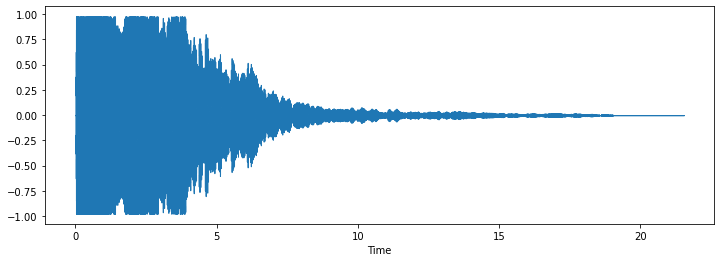

In [7]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

In [8]:
import IPython
IPython.display.Audio(data=array, rate=sampling_rate)

## The frequency spectrum

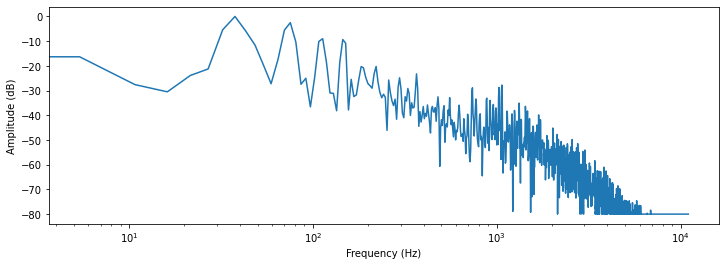

In [9]:
import numpy as np
dft_input = array[:4096]

# calculate DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# amplitude spectrum in dB
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

#frequency_bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")


## Spectrogram

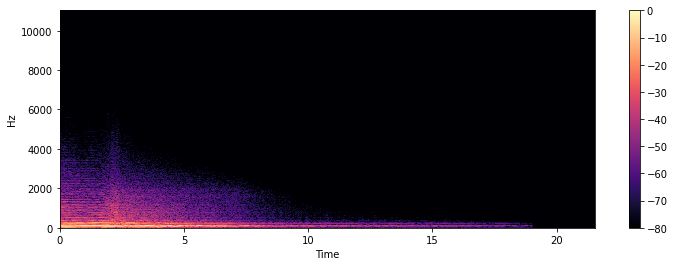

In [10]:
D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

## Mel spectrogram

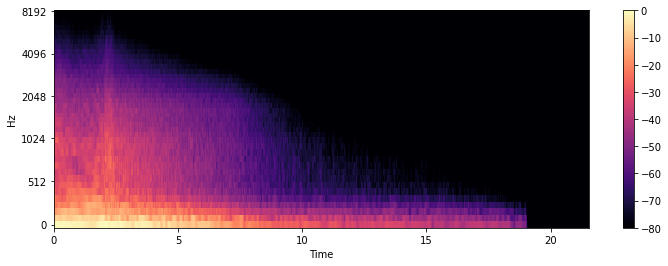

In [11]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=40, fmax=8000)
S_db = librosa.power_to_db(S, ref=np.max)
plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

# Load and explore an audio dataset

In [12]:
from datasets import load_dataset
minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

Found cached dataset minds14 (/tmp/huggingface_caches/datasets/PolyAI___minds14/en-AU/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696)


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [13]:
example = minds[0]
example

{'path': '/tmp/huggingface_caches/datasets/downloads/extracted/eceea8cc32cf2fd2b249aeb6ac5effc60b69430ddd38616db56e0d1dafe51cba/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/tmp/huggingface_caches/datasets/downloads/extracted/eceea8cc32cf2fd2b249aeb6ac5effc60b69430ddd38616db56e0d1dafe51cba/en-AU~PAY_BILL/response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [14]:
id2label = minds.features['intent_class'].int2str
id2label(example['intent_class'])

'pay_bill'

In [15]:
import librosa
from IPython.display import Audio
array, sampling_rate = librosa.load(example['path'])
Audio(data=array, rate=sampling_rate)

In [16]:
# remove unnecessary features
columns_to_remove = ['lang_id', 'english_transcription']
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

In [17]:
import IPython.display as ipd
def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])



for _ in range(4):
    audio, label = generate_audio()
    print(label)
    ipd.display(Audio(data=audio[1], rate=audio[0]))
    

direct_debit


atm_limit


latest_transactions


address


In [18]:
minds_uk=minds = load_dataset("PolyAI/minds14", name="en-GB", split="train")
minds_uk

Generating train split: 0 examples [00:00, ? examples/s]

Dataset minds14 downloaded and prepared to /tmp/huggingface_caches/datasets/PolyAI___minds14/en-GB/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 592
})

In [19]:
minds_uk = minds_uk.remove_columns(columns_to_remove)
minds_uk

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 592
})

In [ ]:
import gradio as gr


def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True, share=True)

/usr/local/lib/python3.8/dist-packages/gradio/processing_utils.py:171: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://84a75006aaa9d57ce2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Preprocessing an Audio Dataset

In [21]:
from datasets import Audio
from datasets import load_dataset
minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

Found cached dataset minds14 (/tmp/huggingface_caches/datasets/PolyAI___minds14/en-AU/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696)


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

## Resample audio

In [22]:
# resample
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

In [23]:
minds[0]

{'path': '/tmp/huggingface_caches/datasets/downloads/extracted/eceea8cc32cf2fd2b249aeb6ac5effc60b69430ddd38616db56e0d1dafe51cba/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/tmp/huggingface_caches/datasets/downloads/extracted/eceea8cc32cf2fd2b249aeb6ac5effc60b69430ddd38616db56e0d1dafe51cba/en-AU~PAY_BILL/response_4.wav',
  'array': array([2.36119668e-05, 1.92324660e-04, 2.19284790e-04, ...,
         9.40907281e-04, 1.16613181e-03, 7.20883254e-04]),
  'sampling_rate': 16000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

## Filter dataset

In [24]:
MAX_DURATION_IN_SECONDS = 20.0

In [25]:
import librosa
# add duration columns
new_column = [librosa.get_duration(path=x) for x in minds["path"]]
minds = minds.add_column("duration", new_column)

In [26]:
# filter
minds = minds.filter(lambda x: x < MAX_DURATION_IN_SECONDS, input_columns=["duration"])

Filter:   0%|          | 0/654 [00:00<?, ? examples/s]

In [27]:
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id', 'duration'],
    num_rows: 624
})

In [28]:
minds.remove_columns(["duration"])

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 624
})

## Pre-processing audio data

In [29]:
from transformers import WhisperFeatureExtractor
feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

In [30]:
def prepare_dataset(example):
    audio = example["audio"]
    features = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"], padding=True)
    return features
minds = minds.map(prepare_dataset, num_proc=7)
minds

Map (num_proc=7):   0%|          | 0/624 [00:00<?, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id', 'duration', 'input_features'],
    num_rows: 624
})

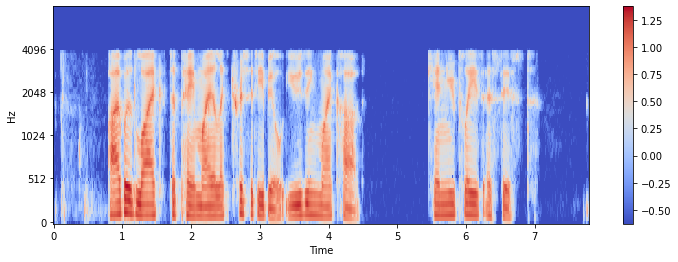

In [31]:
# visualize
import numpy as np
import matplotlib.pyplot as plt
example = minds[0]
input_features = example["input_features"]

plt.figure().set_figwidth(12)
librosa.display.specshow(np.asarray(input_features[0]), x_axis="time", y_axis="mel", sr=feature_extractor.sampling_rate, hop_length=feature_extractor.hop_length)
plt.colorbar()

## Streaming audio data

In [1]:
# have to login to access gigaspeech
from huggingface_hub import login
login()

In [34]:
gigaspeech = load_dataset("speechcolab/gigaspeech", "xs", streaming=True)

In [35]:
next(iter(gigaspeech["train"]))

{'segment_id': 'YOU0000000315_S0000660',
 'speaker': 'N/A',
 'text': "AS THEY'RE LEAVING <COMMA> CAN KASH PULL ZAHRA ASIDE REALLY QUICKLY <QUESTIONMARK>",
 'audio': {'path': 'xs_chunks_0000/YOU0000000315_S0000660.wav',
  'array': array([0.0005188 , 0.00085449, 0.00012207, ..., 0.00125122, 0.00076294,
         0.00036621]),
  'sampling_rate': 16000},
 'begin_time': 2941.89,
 'end_time': 2945.07,
 'audio_id': 'YOU0000000315',
 'title': 'Return to Vasselheim | Critical Role: VOX MACHINA | Episode 43',
 'url': 'https://www.youtube.com/watch?v=zr2n1fLVasU',
 'source': 2,
 'category': 24,
 'original_full_path': 'audio/youtube/P0004/YOU0000000315.opus'}

In [36]:
gigaspeech_head = gigaspeech["train"].take(2)
list(gigaspeech_head)

[{'segment_id': 'YOU0000000315_S0000660',
  'speaker': 'N/A',
  'text': "AS THEY'RE LEAVING <COMMA> CAN KASH PULL ZAHRA ASIDE REALLY QUICKLY <QUESTIONMARK>",
  'audio': {'path': 'xs_chunks_0000/YOU0000000315_S0000660.wav',
   'array': array([0.0005188 , 0.00085449, 0.00012207, ..., 0.00125122, 0.00076294,
          0.00036621]),
   'sampling_rate': 16000},
  'begin_time': 2941.89,
  'end_time': 2945.07,
  'audio_id': 'YOU0000000315',
  'title': 'Return to Vasselheim | Critical Role: VOX MACHINA | Episode 43',
  'url': 'https://www.youtube.com/watch?v=zr2n1fLVasU',
  'source': 2,
  'category': 24,
  'original_full_path': 'audio/youtube/P0004/YOU0000000315.opus'},
 {'segment_id': 'AUD0000001043_S0000775',
  'speaker': 'N/A',
  'text': 'SIX TOMATOES <PERIOD>',
  'audio': {'path': 'xs_chunks_0000/AUD0000001043_S0000775.wav',
   'array': array([ 1.43432617e-03,  1.37329102e-03,  1.31225586e-03, ...,
          -6.10351562e-05, -1.22070312e-04, -1.83105469e-04]),
   'sampling_rate': 16000},
 